In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
df  = pd.read_csv("EasyVisa.csv")

In [6]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
df.shape

(25480, 12)

In [8]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
# Check Null and Dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [11]:
# Distinguish numerical and categorical features
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Print identified columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")



We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [12]:
# Display proportion of count data for categorical columns
for col in categorical_features:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True) * 100)
    print('-' * 30)


Column: case_id
case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
------------------------------

Column: continent
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
------------------------------

Column: education_of_employee
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
------------------------------

Column: has_job_experience
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
------------------------------

Column: requires_job_training
requires_j

In [15]:
SAVE_FIG_PATH = "images/"

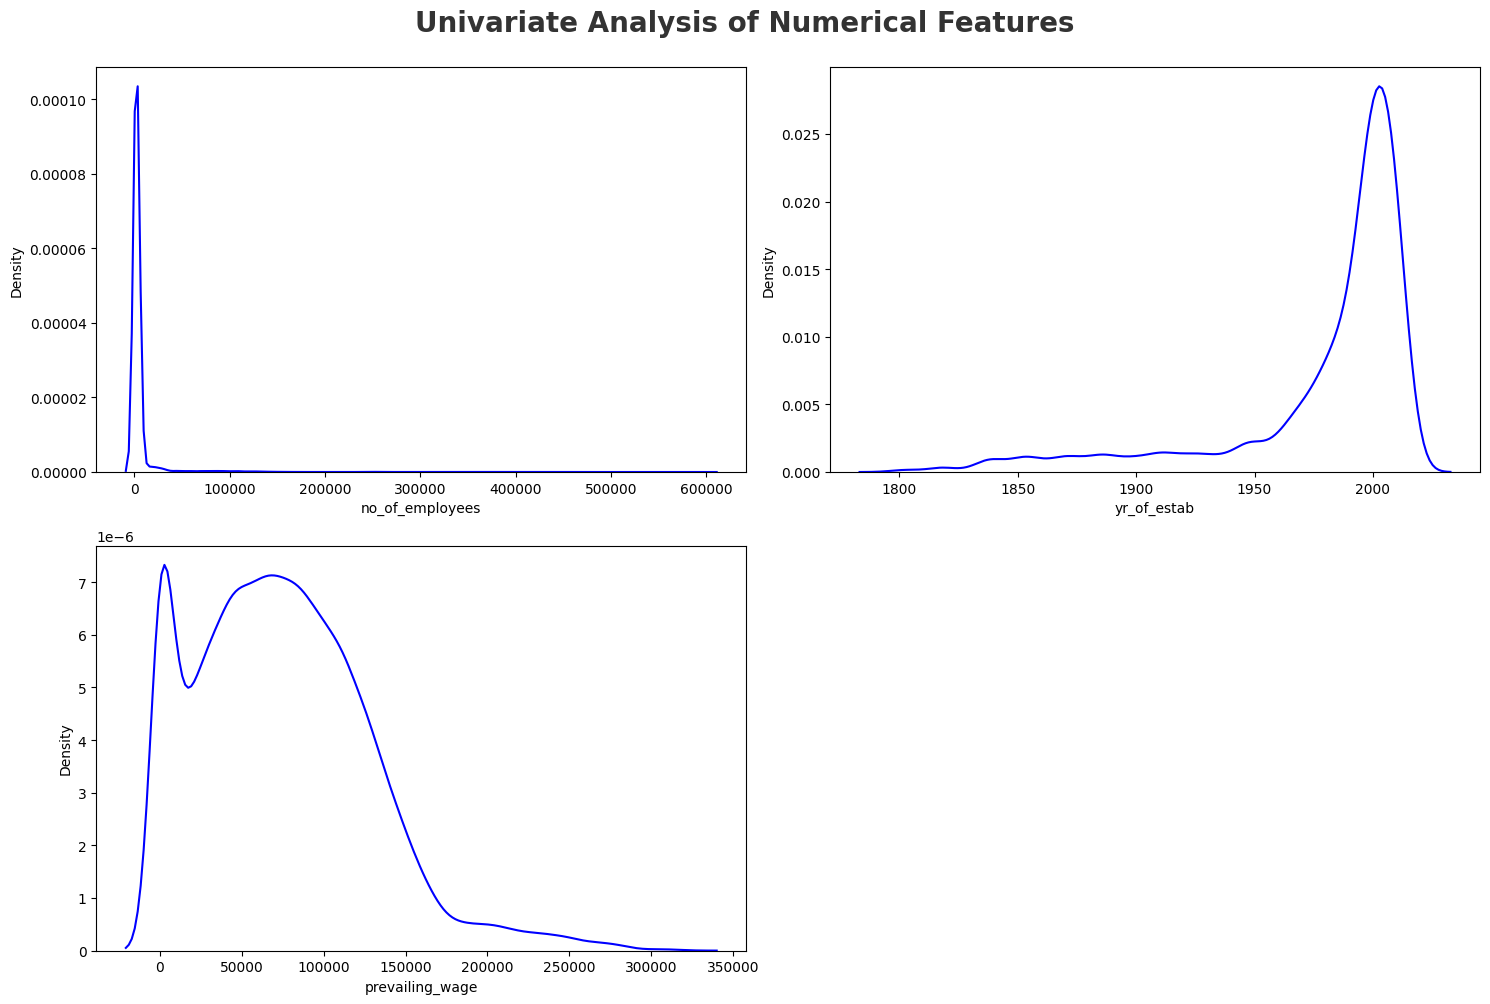

In [22]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the directory exists
save_dir = "./images"
os.makedirs(save_dir, exist_ok=True)  # Creates the directory if it doesn't exist

# Plot settings
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through numeric features and plot distributions
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(x=df[feature], color='blue')
    plt.xlabel(feature)
    plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "Univariate_Num.png"))
plt.show()  # Optional: Display the plot


In [23]:
import os

import seaborn as sns

# Ensure the directory exists
save_dir = "./images"
os.makedirs(save_dir, exist_ok=True)  # Creates the directory if it doesn't exist

# Remove 'case_id' from categorical features
categorical_features.remove('case_id')

# Plot settings
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through categorical features and plot countplots
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[feature])
    plt.xlabel(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "Univariate_Cat.png"))
plt.show()  # Optional: Display the plot

ValueError: list.remove(x): x not in list

In [24]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]

In [25]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]


In [26]:
print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous features : {}'.format(len(continuous_features), continuous_features))


We have 0 discrete features : []

We have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [27]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

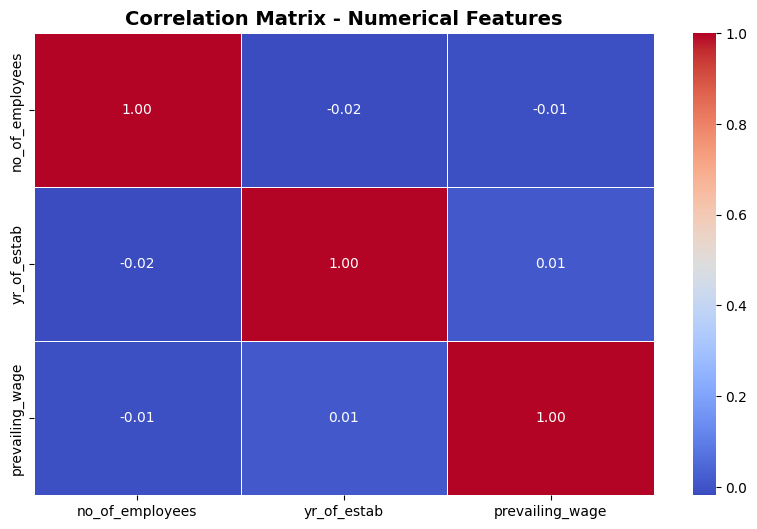

In [29]:
### 📌 **1. Check Multicollinearity in Numerical Features**
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix - Numerical Features", fontsize=14, fontweight='bold')
plt.show()


In [31]:

### 📌 **2. Chi-Square Test for Categorical Features**
chi2_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df["case_status"], df[feature])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    result = "Reject Null Hypothesis" if p_value < 0.05 else "Fail to Reject Null Hypothesis"
    chi2_results.append({"Feature": feature, "P-value": round(p_value, 4), "Result": result})


In [32]:
chi2_df = pd.DataFrame(chi2_results)

In [33]:
print(chi2_df)

                 Feature  P-value                          Result
0              continent   0.0000          Reject Null Hypothesis
1  education_of_employee   0.0000          Reject Null Hypothesis
2     has_job_experience   0.0000          Reject Null Hypothesis
3  requires_job_training   0.1856  Fail to Reject Null Hypothesis
4   region_of_employment   0.0000          Reject Null Hypothesis
5           unit_of_wage   0.0000          Reject Null Hypothesis
6     full_time_position   0.0447          Reject Null Hypothesis
7            case_status   0.0000          Reject Null Hypothesis


In [34]:
### 📌 **3. Report Insights**
for _, row in chi2_df.iterrows():
    print(f"Feature: {row['Feature']} - {row['Result']}")

Feature: continent - Reject Null Hypothesis
Feature: education_of_employee - Reject Null Hypothesis
Feature: has_job_experience - Reject Null Hypothesis
Feature: requires_job_training - Fail to Reject Null Hypothesis
Feature: region_of_employment - Reject Null Hypothesis
Feature: unit_of_wage - Reject Null Hypothesis
Feature: full_time_position - Reject Null Hypothesis
Feature: case_status - Reject Null Hypothesis


# 📊 Statistical and Mathematical Explanation Behind Multicollinearity & Chi-Square Test
1. Multicollinearity in Numerical Features
What is Multicollinearity?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning one variable can be linearly predicted from the others with substantial accuracy. This affects the model's ability to determine the true effect of each predictor.
Why is Multicollinearity a Problem?

    It inflates the standard errors of regression coefficients.
    The model becomes unstable, leading to wrong coefficient estimates.
    Some variables might be statistically insignificant, even if they are important predictors.

How to Detect Multicollinearity?

We use the correlation matrix (Pearson’s Correlation Coefficient) and Variance Inflation Factor (VIF).
Mathematics Behind Correlation Matrix

The correlation coefficient rr between two variables XX and YY is given by:
rX,Y=∑(Xi−Xˉ)(Yi−Yˉ)∑(Xi−Xˉ)2×∑(Yi−Yˉ)2
rX,Y​=∑(Xi​−Xˉ)2
​×∑(Yi​−Yˉ)2
​∑(Xi​−Xˉ)(Yi​−Yˉ)​

where:

    XˉXˉ and YˉYˉ are the means of XX and YY,
    XiXi​ and YiYi​ are individual observations.

Interpretation of Correlation Coefficient rr:

    r=0r=0 → No correlation
    0<∣r∣<0.30<∣r∣<0.3 → Weak correlation
    0.3≤∣r∣<0.70.3≤∣r∣<0.7 → Moderate correlation
    0.7≤∣r∣≤10.7≤∣r∣≤1 → Strong correlation (possible multicollinearity)

Variance Inflation Factor (VIF)

VIF quantifies the severity of multicollinearity in a regression model. It is given by:
VIFi=11−Ri2
VIFi​=1−Ri2​1​

where Ri2Ri2​ is the coefficient of determination when variable ii is regressed against all other independent variables.

Rule of Thumb for VIF:

    VIF<5VIF<5 → No serious multicollinearity
    5≤VIF<105≤VIF<10 → Moderate multicollinearity
    VIF≥10VIF≥10 → Severe multicollinearity (Drop the variable)

2. Chi-Square Test for Categorical Features
What is the Chi-Square Test?

The Chi-Square (χ2χ2) test is used to determine if there is a significant relationship between two categorical variables. It tests whether an observed frequency distribution differs from an expected distribution.
Hypothesis Testing:

    Null Hypothesis (H0H0​): The categorical feature is independent of the target variable (no correlation).
    Alternative Hypothesis (H1H1​): The categorical feature and target variable are correlated.

Mathematics Behind Chi-Square Test

We construct a contingency table, where:

    Rows represent categories of the target variable (e.g., Certified, Denied).
    Columns represent categories of the feature being tested.

The Chi-Square statistic is computed as:
χ2=∑(O−E)2E
χ2=∑E(O−E)2​

where:

    OO = Observed frequency
    EE = Expected frequency

The expected frequency is calculated as:
Eij=Row Total×Column TotalGrand Total
Eij​=Grand TotalRow Total×Column Total​

where ii and jj represent different categories.
Interpreting the p-value

The p-value from the chi-square test helps determine if the result is significant:

    p-value <0.05<0.05 → Reject H0H0​ (Feature is correlated with target)
    p-value ≥0.05≥0.05 → Fail to reject H0H0​ (Feature is independent)

In [35]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [36]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


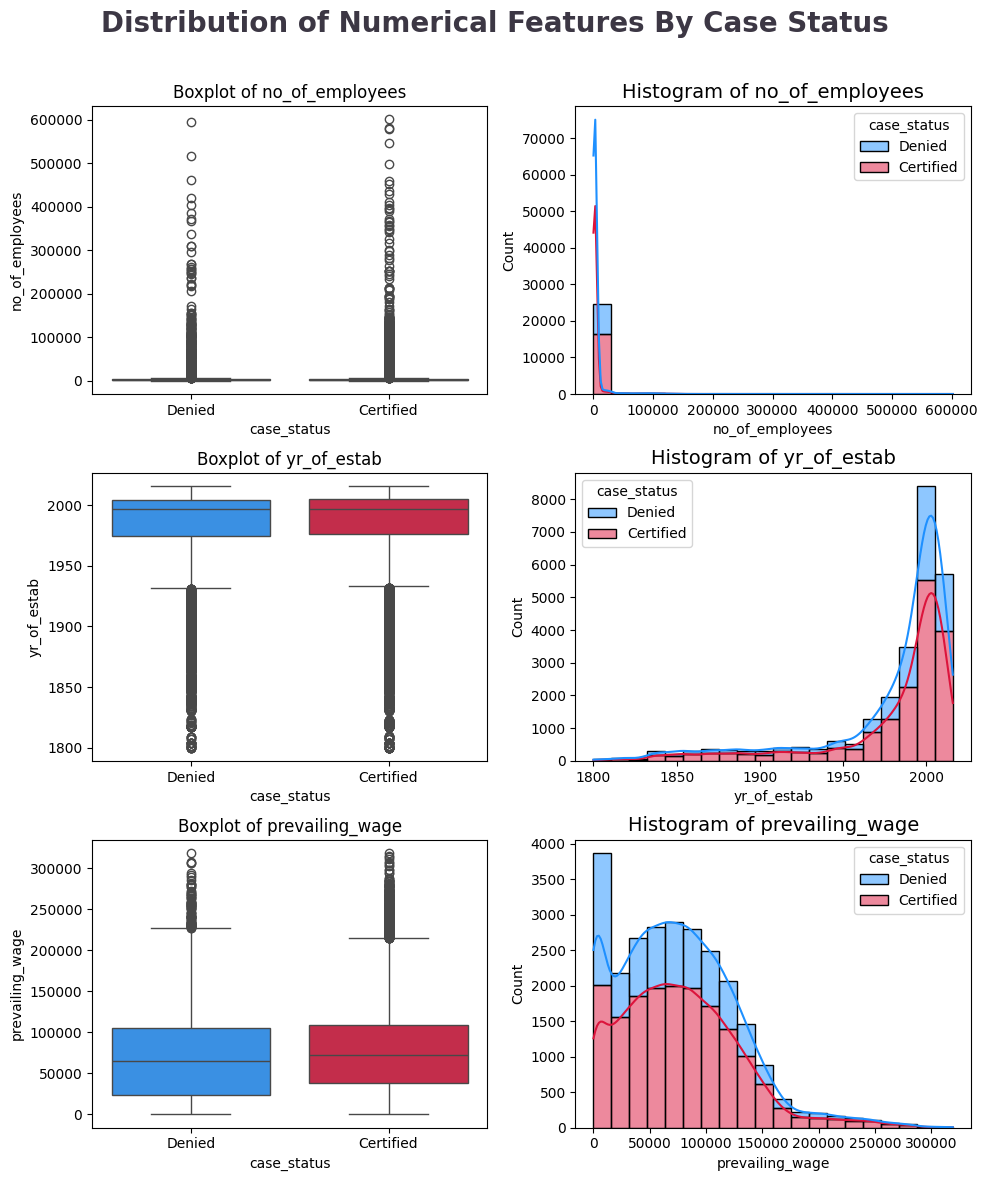

In [37]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

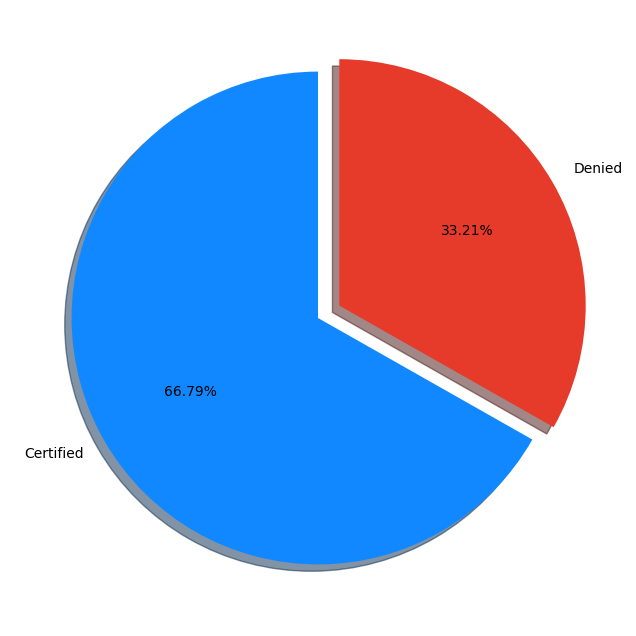

In [38]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()



In [39]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

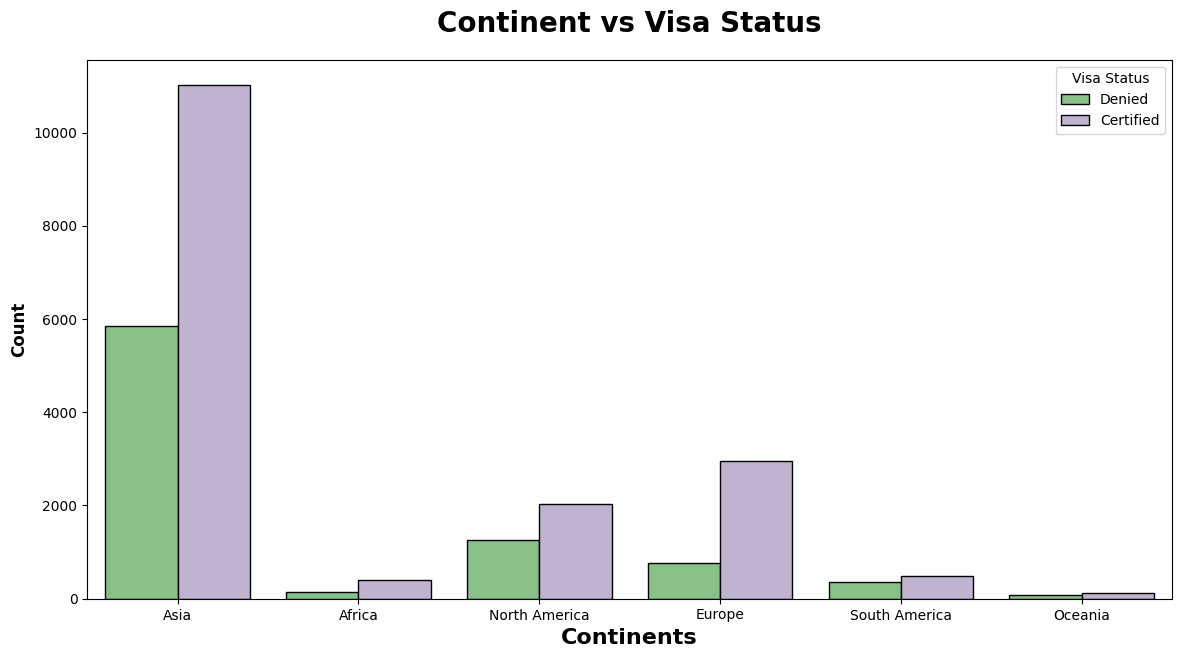

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()


In [41]:
df2 = df.copy()

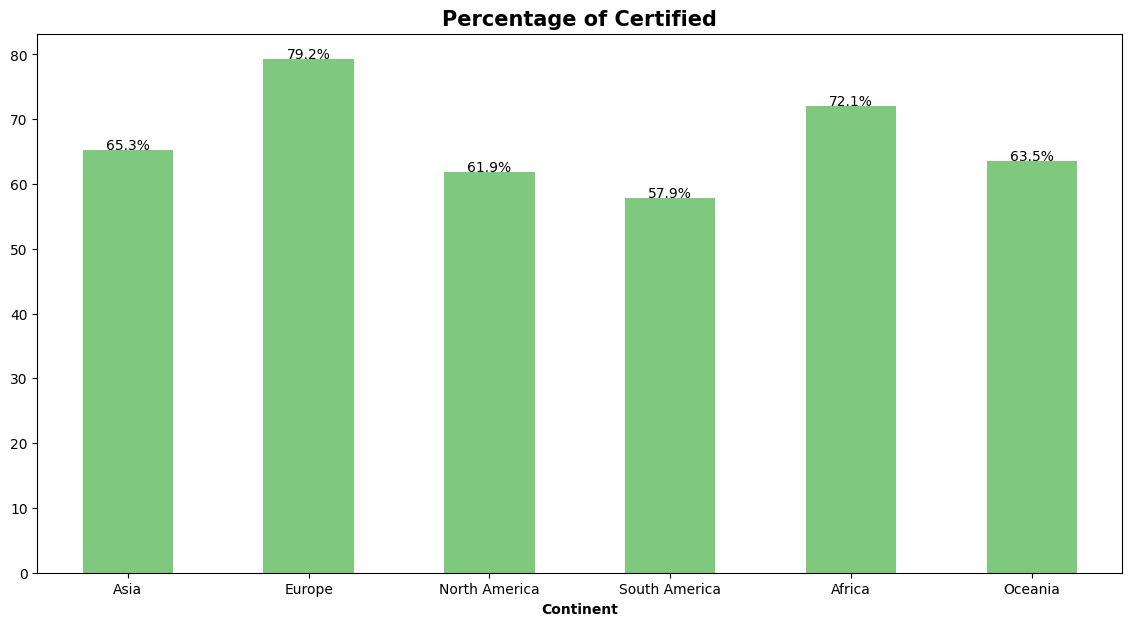

In [42]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()



In [43]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

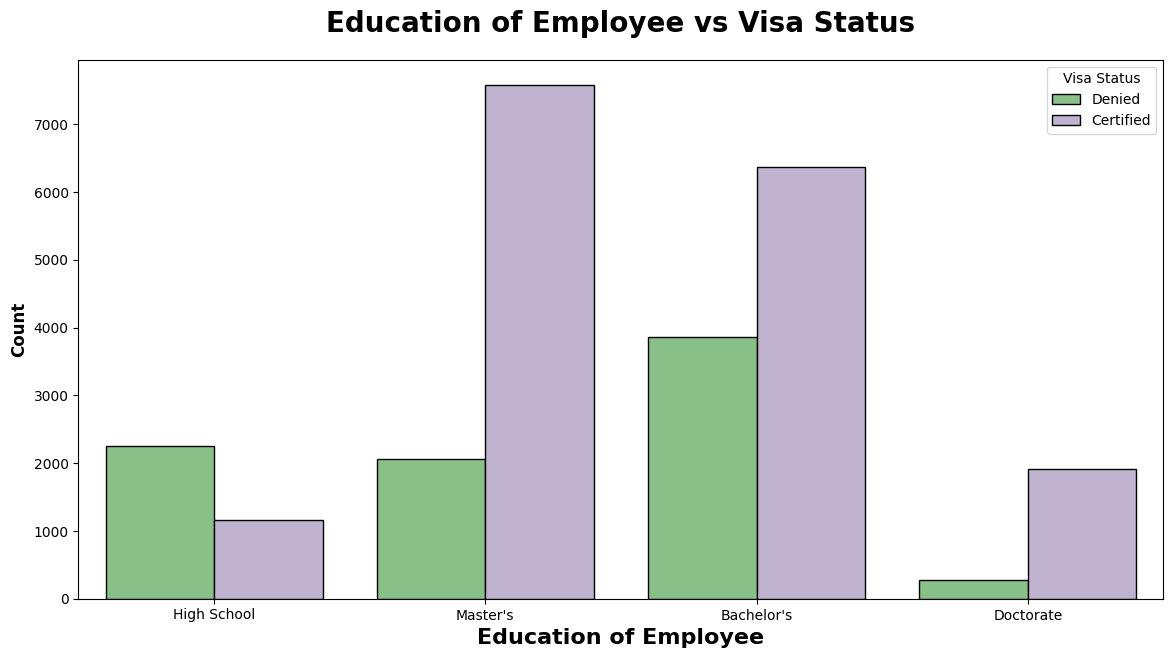

In [44]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

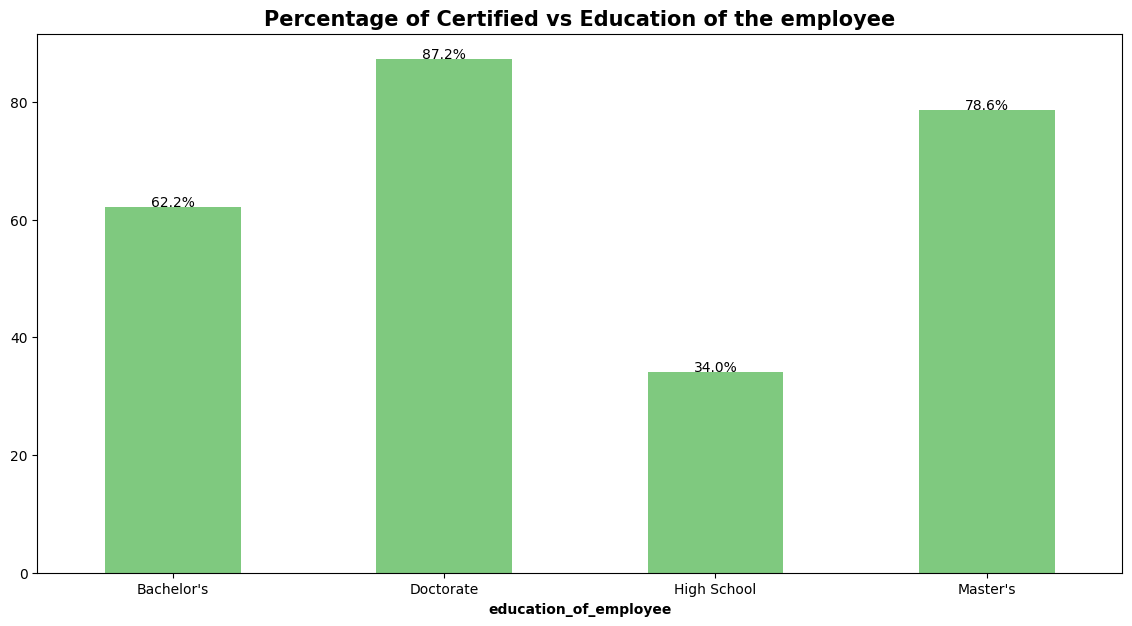

In [45]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [46]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100


proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

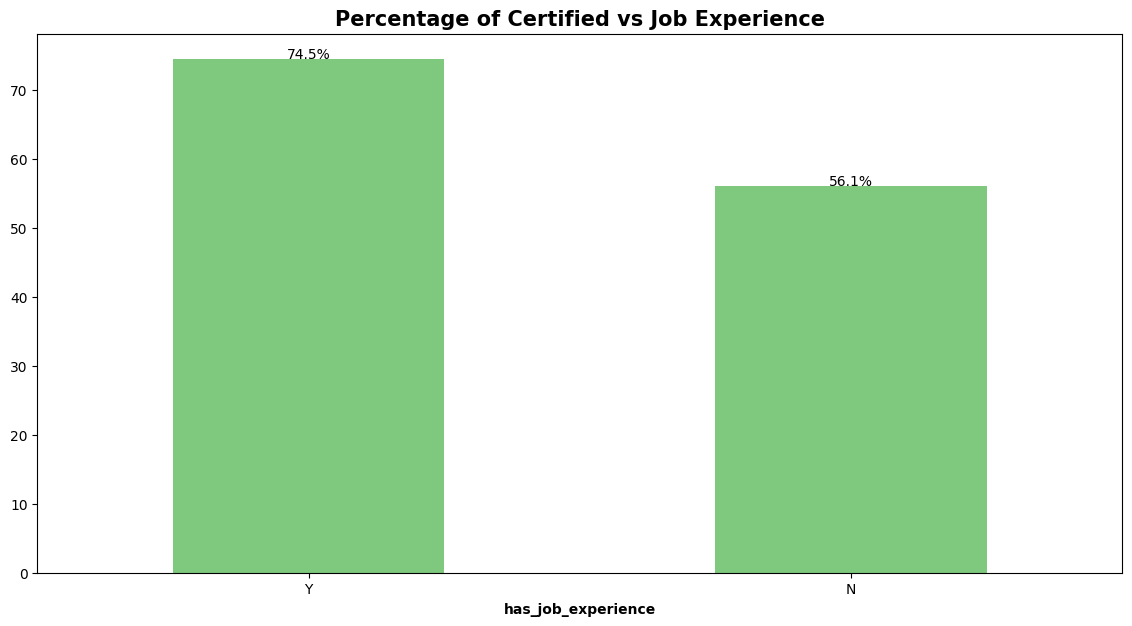

In [47]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [48]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

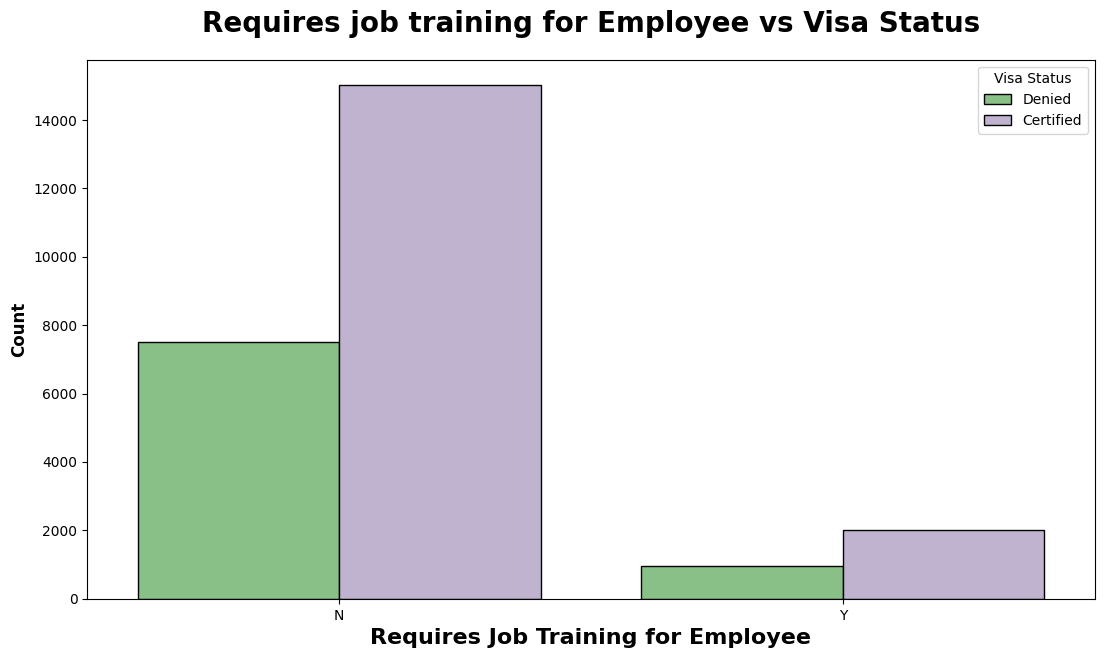

In [49]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()


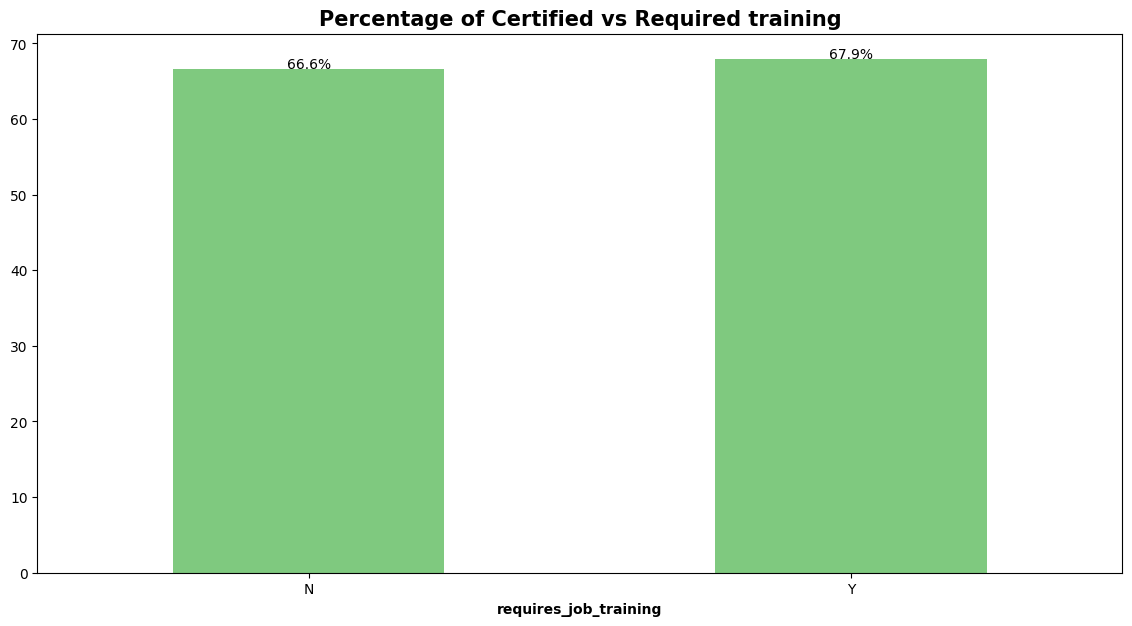

In [50]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


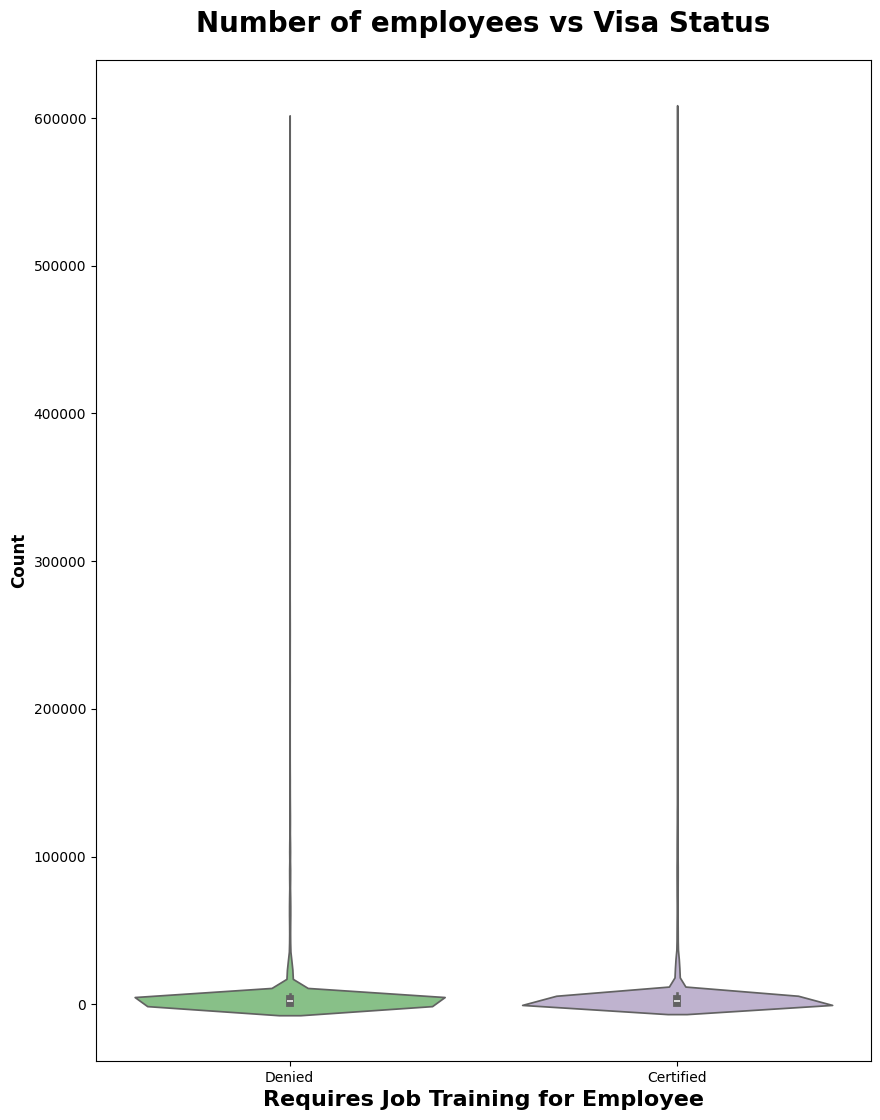

In [51]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()



In [52]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

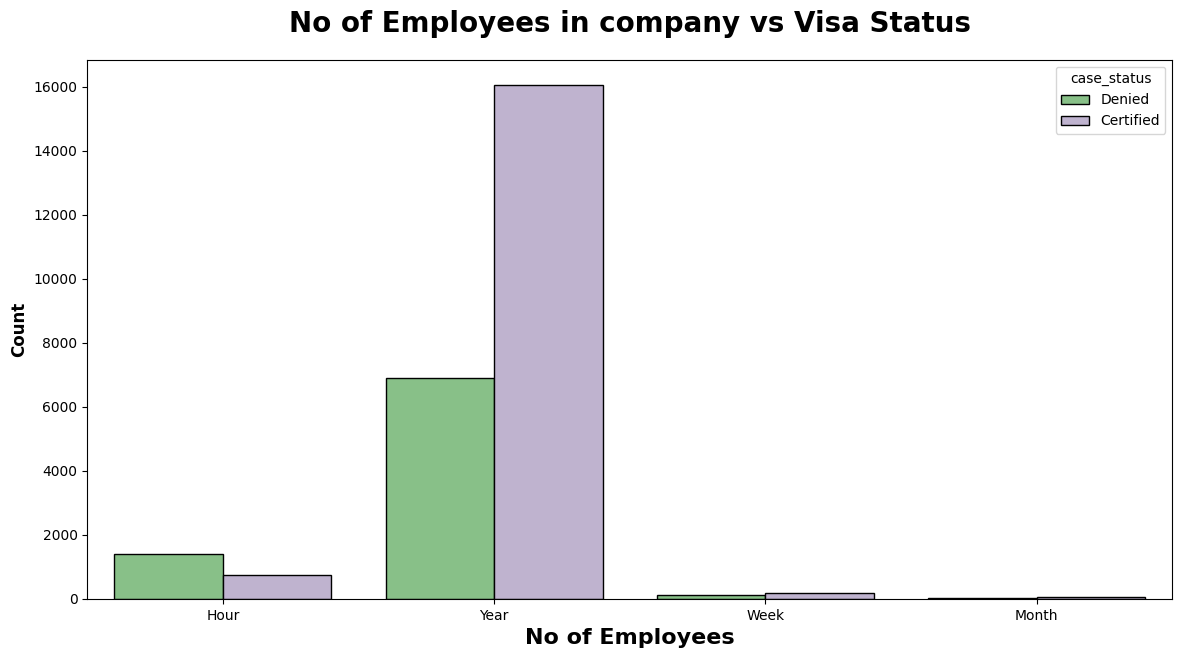

In [53]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

